In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi


df = pd.read_csv('Rotman MMA Summer Datathon.csv')
#filtering for data for women only
women_data = df[df['team_name'].str.contains("Women") & df['team_name'].str.contains("Canada")]
#women_data.head()
#women_data.columns

def div_safe(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        return 0



In [2]:
#----------------------------Event Type Specialist Selection----------------------------

# Description: The coaches would like to select five top players.  
# The players should, ideally, excel in all areas of the game.  
# Since scoring goals is the ultimate objective, at least three 
# should be excellent goal scorers and at least two should be excellent passers.  
# In addition, you need at least two faceoff specialists and one takeaway specialist.  
# It would be especially beneficial if the passers were familiar with the shooting specialists 
# (i.e., had a good track record of completing passes to these players). 

#nested dictionary
names_AllEvents = dict()
name_SuccessEvent = dict()
name_SuccessEventRate = dict()

#i for index, j as content
for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    event = women_data.loc[i]['event_type']
    success = women_data.loc[i]['event_successful']
    if name not in names_AllEvents:
        names_AllEvents[name] = {'Faceoff': 0, 'Play': 0, 'Takeaway': 0, 'Shot': 0}
        name_SuccessEvent[name] = {'Faceoff': 0, 'Play': 0, 'Takeaway': 0, 'Shot': 0}
    names_AllEvents[name][event] = names_AllEvents[name].get(event,0)+1
    if success == 't':
        name_SuccessEvent[name][event] = name_SuccessEvent[name].get(event,0)+1

name_performance = dict()
faceoff_dict = dict()
play_dict = dict()
shot_dict = dict()
takeaway_dict = dict()

for name,value in names_AllEvents.items():
    faceoff_dict[name] =  [div_safe(name_SuccessEvent[name]['Faceoff'],value['Faceoff']),name_SuccessEvent[name]['Faceoff'],value['Faceoff']]
    play_dict[name] =  [div_safe(name_SuccessEvent[name]['Play'],value['Play']),name_SuccessEvent[name]['Play'],value['Play']]
    takeaway_dict[name] =  [div_safe(name_SuccessEvent[name]['Takeaway'],value['Takeaway']),name_SuccessEvent[name]['Takeaway'],value['Takeaway']]   
    shot_dict[name] =  [div_safe(name_SuccessEvent[name]['Shot'],value['Shot']),name_SuccessEvent[name]['Shot'],value['Shot']]
    name_performance[name] = [faceoff_dict[name][0],play_dict[name][0],takeaway_dict[name][0],shot_dict[name][0]]

faceoff_dict= sorted(faceoff_dict.items(), key=lambda x: x[1],reverse = True)
play_dict= sorted(play_dict.items(), key=lambda x: x[1],reverse = True)
takeaway_dict= sorted(takeaway_dict.items(), key=lambda x: x[1],reverse = True)
shot_dict= sorted(shot_dict.items(), key=lambda x: x[1],reverse = True)

# print ("Performance Summary: ", name_performance)
# print ("-------------")
# print ("Faceoff: ", faceoff_dict)
# print ("-------------")
# print ("Play: ", play_dict)
# print ("-------------")
# print ("Takeawy: ", takeaway_dict)
# print ("-------------")
# print ("Shot: ", shot_dict)

# print (len(name_performance))


In [3]:
#----------------------------Power/Penalty Specialist Selection (All Games)  ----------------------------
# The coaches would like to select five power play specialists and four penalty kill specialists.  
# Note that the main objective of the power play is to score goals, while the main objective of 
# the penalty kill is to prevent the opponent from doing so.  
# Thus, the key skills for a penalty killer are takeaways and precise passes.  
# For a power play specialist the key skills are successful shots and precise passes.

#penalty kill -> 4 on 5
#power play -> 5 on 4

penalty_EventCount = dict()
power_EventCount = dict()

for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    situation = women_data.loc[i]['situation_type']
    event = women_data.loc[i]['event_type']
    success = women_data.loc[i]['event_successful']
    # seperate penalty and power play
    if situation == '4 on 5' or situation == '3 on 5':        
        if name not in penalty_EventCount:
            penalty_EventCount[name] = {'Play': [0,0], 'Takeaway': [0,0]}
        #only care about the two event
        if event in penalty_EventCount[name]:
            penalty_EventCount[name][event][1] = penalty_EventCount[name][event][1]+1
            if success == 't':
                penalty_EventCount[name][event][0] = penalty_EventCount[name][event][0]+1
    elif situation == '5 on 4' or situation == '5 on 3' :
        if name not in power_EventCount:
            power_EventCount[name] = {'Play': [0,0], 'Shot': [0,0]}
        #only care about the two event
        if event in power_EventCount[name]:
            power_EventCount[name][event][1] = power_EventCount[name][event][1]+1
            if success == 't':
                power_EventCount[name][event][0] = power_EventCount[name][event][0]+1

for name,value in penalty_EventCount.items():
        penalty_EventCount[name]['Play'].append(div_safe(value['Play'][0],value['Play'][1]))
        penalty_EventCount[name]['Takeaway'].append(div_safe(value['Takeaway'][0],value['Takeaway'][1]))
        
for name,value in power_EventCount.items():
        power_EventCount[name]['Play'].append(div_safe(value['Play'][0],value['Play'][1]))
        power_EventCount[name]['Shot'].append(div_safe(value['Shot'][0],value['Shot'][1]))

# penalty_rate= sorted(penalty_rate.items(), key=lambda x: x[1],reverse = True)
# power_rate= sorted(power_rate.items(), key=lambda x: x[1][1],reverse = True)

# penalty rate: (name, [rate success of play, # of Takeaway])
# power rate: (name, [rate success of play, rate success of Shot])

print ("All Penalty: ", penalty_EventCount)
print ("------------------------")
print ("All Power: ", power_EventCount)

#{name: {type_event: [success_count, all_counts, rate]}

All Penalty:  {'Emily Clark': {'Play': [2, 5, 0.4], 'Takeaway': [4, 4, 1.0]}, 'Meaghan Mikkelson': {'Play': [3, 4, 0.75], 'Takeaway': [0, 0, 0]}, 'Sarah Nurse': {'Play': [1, 3, 0.3333333333333333], 'Takeaway': [0, 0, 0]}, 'Jocelyne Larocque': {'Play': [8, 12, 0.6666666666666666], 'Takeaway': [7, 7, 1.0]}, 'Renata Fast': {'Play': [7, 13, 0.5384615384615384], 'Takeaway': [3, 3, 1.0]}, 'Jillian Saulnier': {'Play': [2, 2, 1.0], 'Takeaway': [2, 2, 1.0]}, 'Brianne Jenner': {'Play': [0, 3, 0.0], 'Takeaway': [2, 2, 1.0]}, 'Lauriane Rougeau': {'Play': [5, 5, 1.0], 'Takeaway': [0, 0, 0]}, 'Laura Stacey': {'Play': [2, 3, 0.6666666666666666], 'Takeaway': [4, 4, 1.0]}, 'Marie-Philip Poulin': {'Play': [2, 3, 0.6666666666666666], 'Takeaway': [3, 3, 1.0]}, 'Meghan Agosta': {'Play': [2, 2, 1.0], 'Takeaway': [0, 0, 0]}, 'Shannon Szabados': {'Play': [3, 5, 0.6], 'Takeaway': [0, 0, 0]}, 'Blayre Turnbull': {'Play': [6, 10, 0.6], 'Takeaway': [2, 2, 1.0]}, 'Laura Fortino': {'Play': [6, 10, 0.6], 'Takeaway': 

In [36]:
#----------------------------Power/Penalty Specialist Selection (Recieve)  ----------------------------
# The coaches would like to select five power play specialists and four penalty kill specialists.  
# Note that the main objective of the power play is to score goals, while the main objective of 
# the penalty kill is to prevent the opponent from doing so.  
# Thus, the key skills for a penalty killer are takeaways and precise passes.  
# For a power play specialist the key skills are successful shots and precise passes.


#penalty kill -> 4 on 5
#power play -> 5 on 4

penalty_recieve = dict()
power_recieve = dict()

for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    situation = women_data.loc[i]['situation_type']
    receiver = women_data.loc[i]['receiver_name']
    event = women_data.loc[i]['event_type']
    success = women_data.loc[i]['event_successful']
    # seperate penalty and power play  
    if situation == '4 on 5' or situation == '3 on 5':        
        if receiver not in penalty_recieve:
            penalty_recieve[receiver] = {'Play': [0,0]}
        #only care about the two event
        if event in penalty_recieve[receiver]:
            penalty_recieve[receiver][event][1] = penalty_recieve[receiver][event][1]+1
            if success == 't':
                penalty_recieve[receiver][event][0] = penalty_recieve[receiver][event][0]+1
    elif situation == '5 on 4' or situation == '5 on 3' :
        if receiver not in power_recieve:
            power_recieve[receiver] = {'Play':[0,0]}
        #only care about the two event
        if event in power_recieve[receiver]:
            power_recieve[receiver][event][1] = power_recieve[receiver][event][1]+1
            if success == 't':
                power_recieve[receiver][event][0] = power_recieve[receiver][event][0]+1


for name,value in penalty_recieve.items():
        penalty_recieve[name]['Play'].append(div_safe(value['Play'][0],value['Play'][1]))
                
for name,value in power_recieve.items():
        power_recieve[name]['Play'].append(div_safe(value['Play'][0],value['Play'][1]))
        
# penalty_rate= sorted(penalty_rate.items(), key=lambda x: x[1],reverse = True)
# power_rate= sorted(power_rate.items(), key=lambda x: x[1][1],reverse = True)

# penalty rate: (name, [rate success of play, # of Takeaway])
# power rate: (name, [rate success of play, rate success of Shot])


print ("All Penalty: ", penalty_recieve)
print ("------------------------")
print ("All Power: ", power_recieve)

#{name: {type_event: [success_count, all_counts, rate]}


All Penalty:  {nan: {'Play': [0, 0, 0]}, 'Emily Clark': {'Play': [4, 6, 0.6666666666666666]}, 'Sarah Nurse': {'Play': [4, 8, 0.5]}, 'Bailey Bram': {'Play': [2, 4, 0.5]}, 'Jocelyne Larocque': {'Play': [7, 8, 0.875]}, 'Blayre Turnbull': {'Play': [4, 5, 0.8]}, 'Rebecca Johnston': {'Play': [5, 8, 0.625]}, 'Renata Fast': {'Play': [6, 9, 0.6666666666666666]}, 'Lauriane Rougeau': {'Play': [2, 4, 0.5]}, 'Jillian Saulnier': {'Play': [4, 9, 0.4444444444444444]}, 'Meghan Agosta': {'Play': [2, 4, 0.5]}, 'Laura Stacey': {'Play': [7, 11, 0.6363636363636364]}, 'Laura Fortino': {'Play': [3, 5, 0.6]}, 'Meaghan Mikkelson': {'Play': [1, 2, 0.5]}, 'Brianne Jenner': {'Play': [3, 5, 0.6]}, 'Halli Krzyzaniak': {'Play': [1, 1, 1.0]}, 'Brigette Lacquette': {'Play': [3, 3, 1.0]}, 'Marie-Philip Poulin': {'Play': [0, 3, 0.0]}, 'Erin Ambrose': {'Play': [2, 2, 1.0]}, 'Natalie Spooner': {'Play': [0, 2, 0.0]}, 'Ann-Sophie Bettez': {'Play': [2, 2, 1.0]}}
------------------------
All Power:  {'Melodie Daoust': {'Play':

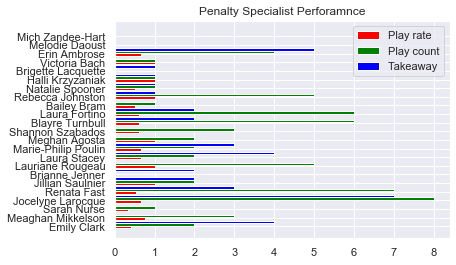

In [18]:
# bar chart -------------------

import os
import numpy as np
import matplotlib.pyplot as plt

# penalty_EventCount= sorted(penalty_EventCount.items(), key=lambda x: x[0][0],reverse = True)
# power_EventCount= sorted(power_EventCount.items(), key=lambda x: x[0][0],reverse = True)

# print ("All Penalty: ", penalty_EventCount)
# print ("------------------------")
# print ("All Power: ", power_EventCount)

namelist = []
x = []
y = []
z = []



for name,value in penalty_EventCount.items():
    namelist.append(name)
    x.append(value['Play'][2])
    y.append(value['Play'][0])
    z.append(value['Takeaway'][0])
    
data = [x,y]

# fig, ax = plt.subplots()    
# width = 0.75 # the width of the bars 
# ind = np.arange(len(y))  # the x locations for the groups

# ax.barh(ind, x, width, color="red")
# ax.barh(ind, y, width, color="blue")
# ax.set_yticks(ind+width/2)
# ax.set_yticklabels(namelist, minor=False)
# plt.title('title')
# # plt.xlabel('x')
# # plt.ylabel('y')      
# #plt.show()
# plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') 


ind = np.arange(len(x))
width = 0.3

fig, ax = plt.subplots()
ax.barh(ind, x, width, color='red', label='Play rate')
ax.barh(ind + width, y, width, color='green', label='Play count')
ax.barh(ind + width*2, z, width, color='blue', label='Takeaway')

#ax.set(yticks=ind + width/3, yticklabels=namelist, ylim=[2*width - 1, len(x)])
plt.yticks(ind + width / 3, namelist)
ax.legend()

#plt.show()
plt.title('Penalty Specialist Perforamnce')
plt.savefig(os.path.join('Penalty Specialist Performance.png'), dpi=300, format='png', bbox_inches='tight') 



In [35]:
#shotting chart

all_cord = dict()
shot_cord = dict()
play_cord = dict()
takeaway_cord = dict()
faceoff_cord = dict()


#all cord -> {name:{Play: [[x,y,t/f],[x,y,t/f]... ], Shot : [...], ...}}
#other_cord -> {name:[[x,y,t/f],[x,y,t/f]... ]}

for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    #game = women_data.loc[i]['game_name']
    event = women_data.loc[i]['event_type']
    eventX = women_data.loc[i]['x_event']
    eventY = women_data.loc[i]['y_event']
    receiveX = women_data.loc[i]['receiver_x']
    receiveY = women_data.loc[i]['receiver_y']
    success = women_data.loc[i]['event_successful']
    situation = women_data.loc[i]['situation_type']
    # seperate penalty and power play
    if name not in all_cord:
        all_cord[name] = {'Faceoff': [], 'Play': [], 'Takeaway': [], 'Shot': []}
        shot_cord[name] = []
        play_cord[name] = []
        takeaway_cord[name] = []
        faceoff_cord[name] = []
    all_cord[name][event].append([eventX,eventY,success,situation])
    if event == "Shot": 
        shot_cord[name].append([eventX,eventY,success,situation])
    elif event == "Play":
        play_cord[name].append([eventX,eventY,receiveX,receiveY,success,situation])
    elif event == "Takeaway":
        takeaway_cord[name].append([eventX,eventY,success,situation])
    elif event == "Faceoff":
        faceoff_cord[name].append([eventX,eventY,success,situation])
    
    
# print ("all_cords: ", all_cord)
# print ("-------------")
# print ("shot_cord: ", shot_cord)
# print ("-------------")
# print ("takeaway_cord: ", takeaway_cord)

        

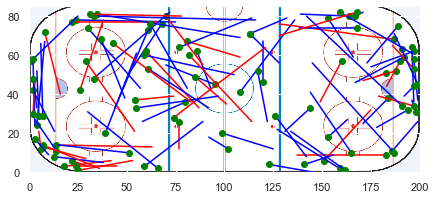

<Figure size 432x288 with 0 Axes>

In [19]:
# pass data chart 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


fp = "HockeyDiagram1.jpg"
img = plt.imread(fp)
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ext = [0.0, 200.00, 0.00, 85.00]
plt.imshow(img, zorder=0, extent=ext)

name = "Emily Clark"

#play_cord[name].append([eventX,eventY,receiveX,receiveY,success])

for i in range(len(play_cord[name])):
    if play_cord[name][i][4] == 't':
        plt.plot([play_cord[name][i][0],play_cord[name][i][2]],
                 [play_cord[name][i][1],play_cord[name][i][3]], 
                 color="blue")
    else: 
        plt.plot([play_cord[name][i][0],play_cord[name][i][2]],
                 [play_cord[name][i][1],play_cord[name][i][3]], 
                 color="red")
    
    plt.plot(play_cord[name][i][0],play_cord[name][i][1],"o", color="green")
    
x_coord = [i[0] for i in play_cord[name]]
y_coord = [i[1] for i in play_cord[name]]

#sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    
plt.show()
plt.savefig(os.path.join('Emily Clark pass data visualization.png'), dpi=300, format='png', bbox_inches='tight') 




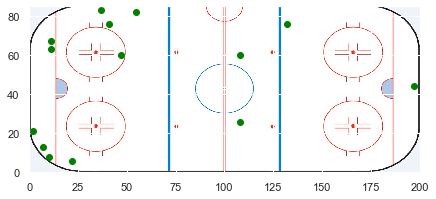

<Figure size 432x288 with 0 Axes>

In [34]:
# takeaway data chart 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


fp = "HockeyDiagram1.jpg"
img = plt.imread(fp)
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ext = [0.0, 200.00, 0.00, 85.00]
plt.imshow(img, zorder=0, extent=ext)

name = "Emily Clark"

#play_cord[name].append([eventX,eventY,receiveX,receiveY,success])

for i in range(len(takeaway_cord[name])):    
    plt.plot(takeaway_cord[name][i][0],takeaway_cord[name][i][1],"o", color="green")
    
x_coord = [i[0] for i in takeaway_cord[name]]
y_coord = [i[1] for i in takeaway_cord[name]]

#sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    
plt.show()
plt.savefig(os.path.join('Emily Clark takeaway data visualization.png'), dpi=300, format='png', bbox_inches='tight') 

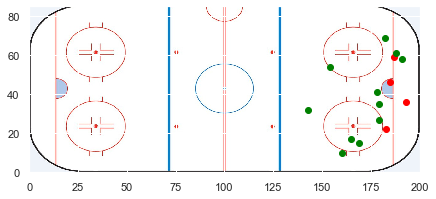

<Figure size 432x288 with 0 Axes>

In [33]:
# shot data chart 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


fp = "HockeyDiagram1.jpg"
img = plt.imread(fp)
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ext = [0.0, 200.00, 0.00, 85.00]
plt.imshow(img, zorder=0, extent=ext)

name = "Emily Clark"

#play_cord[name].append([eventX,eventY,receiveX,receiveY,success])

for i in range(len(shot_cord[name])):    
    if play_cord[name][i][4] == 't':
        plt.plot(shot_cord[name][i][0],shot_cord[name][i][1],"o", color="green")
    else: 
        plt.plot(shot_cord[name][i][0],shot_cord[name][i][1],"o", color="red")
    
    
    
x_coord = [i[0] for i in shot_cord[name]]
y_coord = [i[1] for i in shot_cord[name]]

#sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    
plt.show()
plt.savefig(os.path.join('Emily Clark shot data visualization.png'), dpi=300, format='png', bbox_inches='tight') 

['Faceoff', 'Play', 'Takeaway', 'Shot']
4


ValueError: x and y must have same first dimension, but have shapes (5,) and (8,)

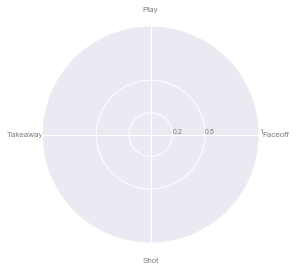

In [39]:
# number of variable
categories=["Faceoff", "Play", "Takeaway", "Shot"]
N = len(categories)
print(categories)
print (N)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

# for name, value in name_performance.items():
#     print (value)
for name, values in name_performance.items():
    values = name_performance[name]
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.5,1], ["0.2","0.5","1"], color="grey", size=7)
    plt.ylim(0,1)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
